<class 'pandas.core.frame.DataFrame'>




C:\Users\82105\AppData\Local\Temp\ipykernel_27444\109627010.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


,age,salary,is_married,is_hereditary,weight,height,is_smoker,stress,bald_prob,education_Bachelor Degree,...,job_role_Employee,job_role_Government Employee,job_role_Jobless,shampoo_Deadbuoy,shampoo_Merpati,shampoo_Moonsilk,shampoo_Pantone,shampoo_Shoulder & Head,gender_female,gender_male
age,,,,,,,,,,,,,,,,,,,,,
2.0,2.0,1.150700e+07,0.0,0.0,63.946479,178.733256,1.00,3.0,0.454950,0.0,...,0.00,1.0,0.00,0.0,1.00,0.0,0.0,0.00,0.00,1.00
5.0,5.0,6.971969e+06,0.0,0.0,53.107190,153.899193,1.00,2.0,0.275482,1.0,...,0.00,0.0,1.00,0.0,1.00,0.0,0.0,0.00,0.00,1.00
7.0,7.0,9.484299e+06,0.0,0.0,60.398564,164.434156,0.00,4.0,0.222680,0.5,...,0.50,0.0,0.50,0.0,0.00,0.0,1.0,0.00,0.50,0.50
8.0,8.0,5.199902e+06,0.0,0.0,62.713771,183.169253,1.00,5.0,0.563737,0.0,...,0.00,1.0,0.00,0.0,0.00,0.0,0.0,1.00,0.00,1.00
9.0,9.0,1.286484e+07,0.0,0.0,52.372711,170.078608,1.00,8.5,0.566331,1.0,...,0.00,0.0,1.00,0.0,0.00,0.0,0.5,0.50,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71.0,71.0,7.616421e+06,1.0,0.5,54.398652,167.251178,0.75,6.0,0.805247,0.0,...,0.25,0.5,0.25,0.0,0.25,0.5,0.0,0.25,0.25,0.75
73.0,73.0,5.728047e+06,1.0,0.0,55.486466,153.996666,1.00,2.0,0.651300,1.0,...,1.00,0.0,0.00,0.0,1.00,0.0,0.0,0.00,1.00,0.00
74.0,74.0,7.043634e+06,1.0,0.0,57.705536,168.003602,1.00,7.0,0.573851,0.0,...,1.00,0.0,0.00,1.0,0.00,0.0,0.0,0.00,1.00,0.00


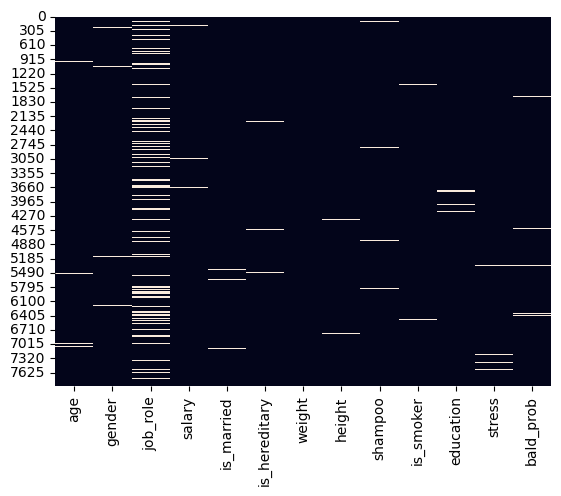

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


file_path = 'bald_probability.csv'

df=pd.read_csv('bald_probability.csv')
df = df.drop('province', axis=1)
df['job_role'].isnull().sum()
df['gender'].isnull().sum()
df['salary'].isnull().sum()
df['is_married'].isnull().sum()
df['is_hereditary'].isnull().sum()
df['weight'].isnull().sum()
df['height'].isnull().sum()
df['shampoo'].isnull().sum()
df['is_smoker'].isnull().sum()
df['education'].isnull().sum()
df['stress'].isnull().sum()
df['age'].isnull().sum()

%matplotlib inline
sns.heatmap(df.isnull(),cbar=False)

df=df.fillna(df.mean())
df.loc[df['education'] != df['education'], 'education'] = 'Senior High School'
df.loc[df['gender'] != df['gender'], 'gender'] = 'male'
df.loc[df['shampoo'] != df['shampoo'], 'shampoo'] = 'Shoulder & Head'
df.loc[df['job_role'] != df['job_role'], 'job_role'] = 'Jobless'

#education_map={'Elementary School':0,'Junior High School':1,'Senior High School':2,'Bachelor Degree':3,'Doctoral Degree':4,'Magister Degree':5}
#df['education']=df['education'].map(education_map)
df=pd.get_dummies(df,columns=['education'])
df=pd.get_dummies(df,columns=['job_role'])
df=pd.get_dummies(df,columns=['shampoo'])
df=pd.get_dummies(df,columns=['gender'])


grouped_one=df.groupby(['is_hereditary'])    
average_one=grouped_one.mean()
#print(average_one)
print(type(average_one))
# 유전력이 있으면 걸릴 확률이 더 높음
print('\n')
grouped_two=df.groupby(['is_married'])
std_all=grouped_two.std()
#print(std_all)
#결혼한 사람이 결혼하지 않은 사람에 비해 나이의 표준편차가 크다.


grouped_three=df.groupby(['age'])
agg_grouped = grouped_three.apply(lambda x : x.mean())
agg_grouped 
#이 데이터를 통해 나이가 많이 들수록 탈모에 걸릴 확률이 높다는 것을 알 수 있다.





NameError: name 'average_one' is not defined

<Figure size 800x600 with 0 Axes>

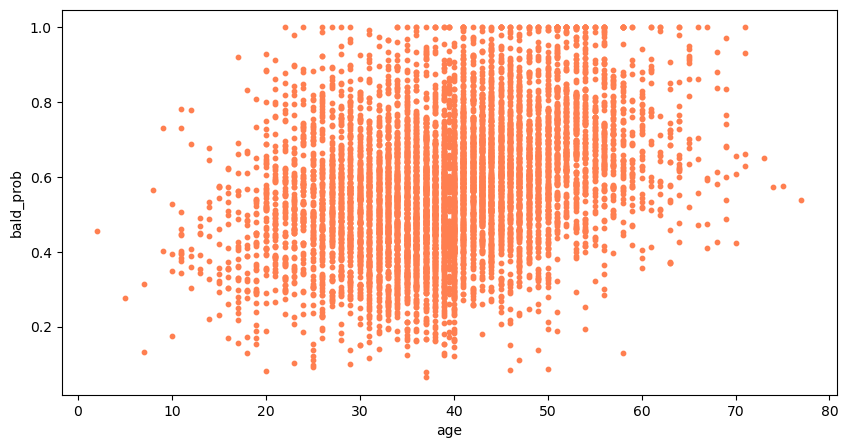

In [2]:
plt.style.use('default')
df.plot(kind='scatter',x='age',y='bald_prob',c='coral',s=10,figsize=(10,5))
plt.show()

C:\Users\82105\AppData\Local\Temp\ipykernel_27444\1125565991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

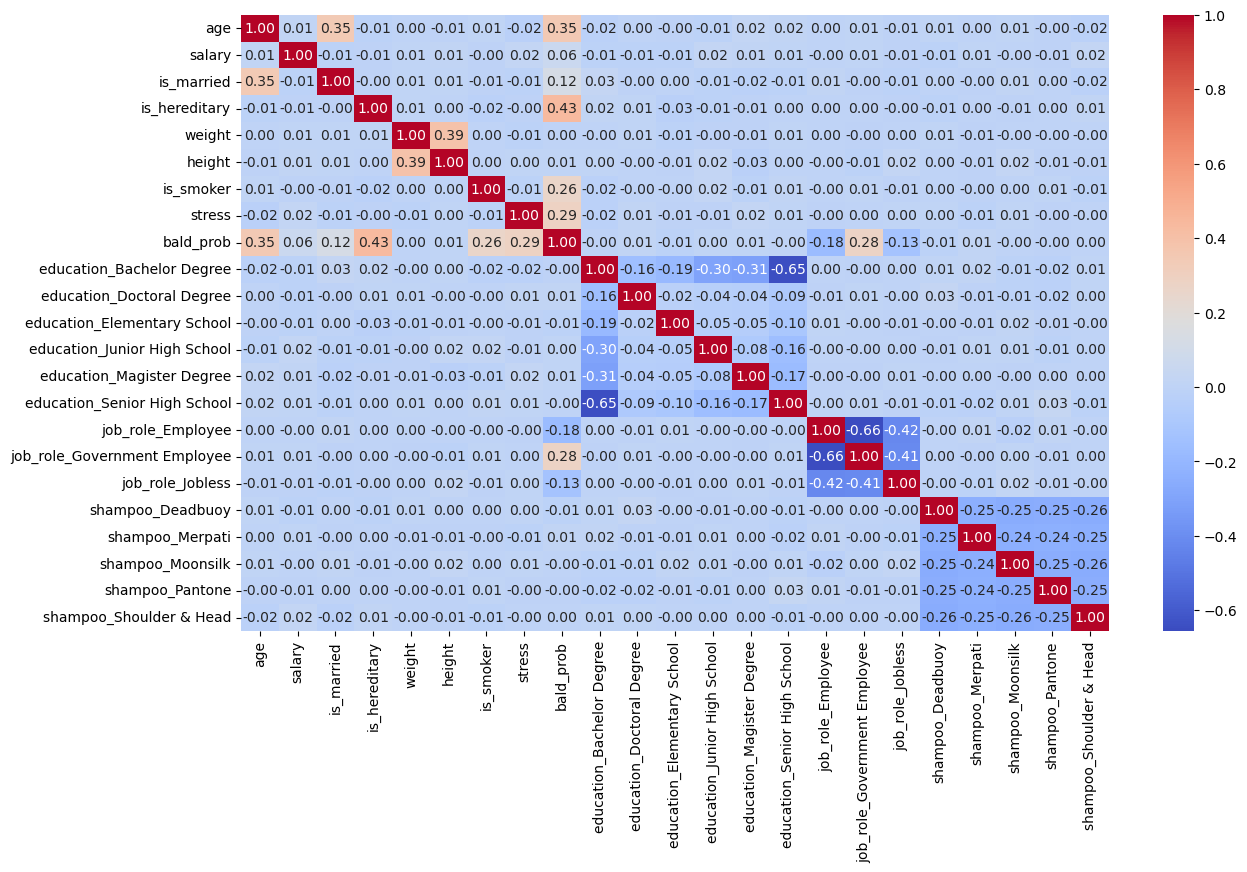

In [3]:
fig=plt.figure(figsize=(14,8))
corr=df.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f")


In [17]:
y = df['bald_prob']
X = df.drop(labels=['bald_prob'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

result = explained_variance_score(y_test, y_pred)

result


0.21793870130302206

NameError: name 'average_one' is not defined

<Figure size 800x600 with 0 Axes>

NameError: name 'agg_grouped' is not defined

<Figure size 1200x800 with 0 Axes>